# Survival Analysis :  Quick Implementation

In [ ]:
#install import stuff, you need to login and give google permissions twice
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!pip install lifelines

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
#mount google drive
%cd
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
#navigating your google drive and saving files inside.
%cd
%ls
%cd drive/
%mkdir ML_course_BII
#download model parameters
%ls -lh */
%ls -lh
%cd ML_course_BII
!wget https://www.dropbox.com/s/w001nnym90esujf/Customer_churn.zip?dl=0 -O Customer_churn.zip
!unzip Customer_churn.zip
%cd Customer_churn
%ls -lh


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns',60)
pd.set_option('display.max_rows', 60)
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


### We will be using Telco Customer Churn data from IBM Watson Analytics
https://www.ibm.com/communities/analytics/watson-analytics-blog/Telco-Customer-Churn/

In [3]:
##  create a dataframe
df = pd.read_excel("./WA_Fn-UseC_-Telco-Customer-Churn.xlsx") 

In [ ]:
'''data description

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, 
online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, 
paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

'''

In [ ]:
## Have a first look at the data
df.head()

In [5]:
#get all columns
df.keys()

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')

In [ ]:
#view churn column , row 2 - 17 #python index starts from 0
df['Churn'].iloc[1:17]

In [ ]:
#percentage of churn customers
np.mean(df['Churn']=='Yes')

In [ ]:
# unique entries of tech support
pd.unique(df['TechSupport'])

In [ ]:
# access churn column from those who are on Tech support
df[df['TechSupport']=='Yes']

In [3]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=(df['Churn']=='Yes')*1

In [ ]:
pd.plotting.scatter_matrix(df)
plt.show()

In [ ]:
plt.subplots(1,1,figsize=(4,4))
plt.title('Contract Type',fontsize=12,fontweight='bold')
plt.plot(df.groupby('Contract')['Churn'].apply(lambda x : np.sum(x==1)),color='red',label='1',marker='o')
plt.plot(df.groupby('Contract')['Churn'].apply(lambda x : np.sum(x==0)),color='blue',label='0',marker='o')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.xlabel('Contract Type',fontsize=12,fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Month.png',dpi=300)

In [ ]:
plt.subplots(1,1,figsize=(4,4))
plt.title('Inernet Service',fontsize=12,fontweight='bold')
plt.plot(df.groupby('InternetService')['Churn'].apply(lambda x : np.sum(x==1)),color='red',label='1',marker='o')
plt.plot(df.groupby('InternetService')['Churn'].apply(lambda x : np.sum(x==0)),color='blue',label='0',marker='o')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.xlabel('InternetService Type',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.ylim([0,2000])
plt.savefig('InternetService.png',dpi=300)

In [ ]:
df.groupby(['Churn','InternetService']).apply(len)

In [ ]:
1297./(459+113+1297)

In [ ]:
print (df.groupby(['Churn','Contract']).apply(len))
1655./(459+113+1297)

In [ ]:
churn = df[df['Churn']==1]
nochurn = df[df['Churn']==0]

In [ ]:
plt.subplots(1,1,figsize=(4,4))
plt.title('MonthlyCharges',fontsize=12,fontweight='bold')
plt.boxplot([churn['MonthlyCharges'],nochurn['MonthlyCharges']])
plt.xticks([1,2],['Churn','No Churn'],fontsize=12,fontweight='bold')
plt.ylabel('MonthlyCharges',fontsize=12,fontweight='bold')

plt.savefig('./MonthlyCharges.png',dpi=300)
plt.show()

In [ ]:
plt.subplots(1,1,figsize=(4,4))
plt.title('Tenure',fontsize=12,fontweight='bold')
plt.boxplot([churn['tenure'],nochurn['tenure']])
plt.xticks([1,2],['Churn','No Churn'],fontsize=12,fontweight='bold')
plt.ylabel('tenure length',fontsize=12,fontweight='bold')

plt.savefig('./Tenure.png',dpi=300)
plt.show()

In [ ]:

for i in pd.unique(df['Contract']):
    print ('type of contract:',i)
    plt.hist(df[df['Contract']==i]['Churn'],density=True,bins=(0,1,2))
    plt.xticks([0.5,1.5],labels=[0,1])
    plt.xlabel('churn ==1, no churn ==0')
    plt.ylabel('normazlied prob density')
    plt.title(i)
    plt.show()

In [ ]:
#checking column for missing entries
df.info()

In [ ]:
#customers with missing values, fill in with median
df[df['TotalCharges'].isnull()]

In [ ]:
## Impute the null value with the median value
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [ ]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [ ]:
## lets have a look at the categories and their distribution in all the categorical columns.

for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

In [ ]:
print ('all variables:',df.keys())
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df_processed = pd.get_dummies(df[variables])

In [ ]:
df_processed.head()

In [ ]:
from sklearn import tree
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = pd.get_dummies(df_processed,drop_first=False) #explanatory variables
y = df['Churn'] #variable to predict

X_train, X_test, y_train, y_test = train_test_split(     
                            X, y, test_size=0.2, random_state=2)


#define descision tree
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_leaf=25)

# train model
clf = clf.fit(X_train, y_train)


In [ ]:
# getting predictions, (each row gives negative and positive class probabilities)
clf.predict_proba(X_test)[:5]

In [ ]:
# get predictions and performance 
y_test_pred = clf.predict_proba(X_test)[:,1]
y_train_pred = clf.predict_proba(X_train)[:,1]
print ('train,test roc:',metrics.roc_auc_score(y_train,y_train_pred),metrics.roc_auc_score(y_test,y_test_pred))

In [ ]:
#print ROC curve
fpr, tpr, thresholds  = metrics.roc_curve(y_train,y_train_pred)
plt.plot([0,1],[0,1],'r--',label='Chance')
plt.plot(fpr,tpr,'b',label='Train results')
fpr, tpr, thresholds  = metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr,'g',label='Test results')

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn",format='png') 
graph

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Explain.png'))
plt.show()

In [ ]:
#making a more complicated model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_leaf=25)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:,1]
y_train_pred = clf.predict_proba(X_train)[:,1]
print ('train,test roc:',metrics.roc_auc_score(y_train,y_train_pred),metrics.roc_auc_score(y_test,y_test_pred))
fpr, tpr, thresholds  = metrics.roc_curve(y_train,y_train_pred)
plt.plot([0,1],[0,1],'r--',label='Chance')
plt.plot(fpr,tpr,'b',label='Train results')
fpr, tpr, thresholds  = metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr,'g',label='Test results')

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn",format='png') 
graph

# Stradegies to reduce churn

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Recommendation1.png'))
plt.show()

In [13]:
pd.unique(df['InternetService'])

array([u'DSL', u'Fiber optic', u'No'], dtype=object)

InternetService  Contract      
DSL              Month-to-month     50.219501
                 One year           61.396754
                 Two year           70.462978
Fiber optic      Month-to-month     87.021194
                 One year           98.779499
                 Two year          104.571445
No               Month-to-month     20.409542
                 One year           20.819505
                 Two year           21.777351
Name: MonthlyCharges, dtype: float64


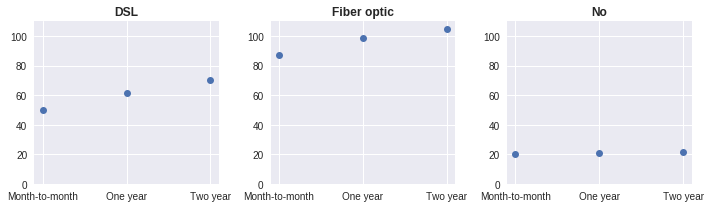

In [29]:
print (df.groupby(['InternetService','Contract'])['MonthlyCharges'].apply(np.mean))
fig,ax = plt.subplots(1,3,figsize=(10,3))
counter = 0
for i in ['DSL','Fiber optic','No']:
    ax[counter].set_title(i,fontsize=12,fontweight='bold')
    ax[counter].plot(df[df['InternetService']==i].groupby('Contract')['MonthlyCharges'].apply(np.mean),'o')
    ax[counter].set_ylim([0,110])
    counter = counter + 1
plt.tight_layout()
plt.savefig('Contract_charges.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Recommendation2.png'))
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Recommendation3.png'))
plt.show()

# Conclusions
Customers who sign for 2 year plans least likely to churn and also bring in more revenue

Highest churn rate are for customers who use fiber optics internet, they are likely disloyal customers and it may be difficult to get them to be loyal.

For 1-2year contract DSL customers, it seems that tech support may decrease their churn rate. Could offer to them free.
